# Stella_Yu_campaign_finance_analysis

This is a list of all the donations the six Conservative Caucus members received over the past few years, per Missouri Ethics Commission. The Caucus was formed at the beginning of this legislative session. The group has since pledged to filibuster against a variety of issues, including the governor's Fast-track workforce program, prescription dug monitoring program and others. It has its own priorities, among which are abortion, legalizing sports gambling and many other tax-related issues.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
##lowercase the string columns
data = pd.read_csv('ConservativeCaucus.csv')
data.columns = [x.lower() for x in data.columns]
data[:1]

,cd1_a id,mecid,committee name,committee,company,first name,last name,address 1,address 2,city,state,zip,employer,occupation,date,amount,contribution type,report
0,1133749,C151102,EIGEL FOR MISSOURI,NaN,NaN,Robert,Trone,9829 Avenel Farm Dr,NaN,Potomac,MD,20854,Retired,NaN,10/5/2018,1000,M,January Quarterly Report


In [3]:
##add a year column in it so it's easier for me to calculate total contribution received each year
data['year'] = pd.DatetimeIndex(data['date']).year

In [4]:
##cleaning up the database by standardizing the case
data['committee name'] = data['committee name'].str.upper()
data['committee'] = data['committee'].str.upper()
data

,cd1_a id,mecid,committee name,committee,company,first name,last name,address 1,address 2,city,state,zip,employer,occupation,date,amount,contribution type,report,year
0,1133749,C151102,EIGEL FOR MISSOURI,NaN,NaN,Robert,Trone,9829 Avenel Farm Dr,NaN,Potomac,MD,20854,Retired,NaN,10/5/2018,1000,M,January Quarterly Report,2018
1,1133751,C151102,EIGEL FOR MISSOURI,RQC PAC,NaN,NaN,NaN,412 County Rd 398,NaN,New Bloomfield,MO,65053,NaN,NaN,10/24/2018,1000,M,January Quarterly Report,2018
2,1133757,C151102,EIGEL FOR MISSOURI,CHEYENNE INTERNATIONAL,NaN,NaN,NaN,701 S Battleground Ave,NaN,Grover,NC,28073,NaN,NaN,12/5/2018,2600,M,January Quarterly Report,2018
3,1133759,C151102,EIGEL FOR MISSOURI,MCA PAC,NaN,NaN,NaN,PO Box 5,NaN,Grover,MO,63040,NaN,NaN,10/5/2018,500,M,January Quarterly Report,2018
4,1133760,C151102,EIGEL FOR MISSOURI,ST LOUIS AREA HOTEL ASSOCIATION PAC,NaN,NaN,NaN,6590B Scanlan Ave,NaN,St Louis,MO,63139,NaN,NaN,10/5/2018,1000,M,January Quarterly Report,2018
5,1133762,C151102,EIGEL FOR MISSOURI,SUPPORTERS OF HEALTH RESEARCH AND TREATMENTS PAC,NaN,NaN,NaN,PO Box 11591,NaN,St Louis,MO,63105,NaN,NaN,10/18/2018,2000,M,January Quarterly Report,2018
6,1133766,C151102,EIGEL FOR MISSOURI,MO BEVERAGE PAC,NaN,NaN,NaN,PO Box 1865,NaN,Jefferson City,MO,65101,NaN,NaN,10/1/2018,300,M,January Quarterly Report,2018
7,1133768,C151102,EIGEL FOR MISSOURI,MAJOR BRANDS INC PAC,NaN,NaN,NaN,6701 Southwest Ave,NaN,St Louis,MO,63146,NaN,NaN,10/16/2018,1000,M,January Quarterly Report,2018
8,1133770,C151102,EIGEL FOR MISSOURI,NEXUS PAC,NaN,NaN,NaN,714 Locust St,NaN,St Louis,MO,63146,NaN,NaN,10/22/2018,1500,M,January Quarterly Report,2018
9,1133772,C151102,EIGEL FOR MISSOURI,MISSOURI OSTEOPATHIC PAC,NaN,NaN,NaN,1423 Randy Ln,NaN,Jefferson City,MO,65101,NaN,NaN,10/5/2018,1000,M,January Quarterly Report,2018


In [5]:
#grouping data
grouped = data.groupby(['committee name', 'year'])
total_by_year = grouped.sum()
total_by_year
##I don't know how to get rid of the cd1_a_id yet so the system just added it up. We can ignore it for now.

cd1_a id  amount
committee name             year                   
CITIZENS FOR HOSKINS       2011    2075764    9075
                           2012   26558838   39243
                           2013   29459312   34380
                           2014   82682652  104470
                           2015  131671420   97274
                           2016  189835462  210006
                           2017   52630095   46642
                           2018  115798093   99250
                           2019   19784676   13675
EIGEL FOR MISSOURI         2015   46699560  153166
                           2016  162135959  752858
                           2017   75913864   66875
                           2018   69070826   75950
                           2019   33727526   26150
FRIENDS OF ANDREW KOENIG   2011    5099998   20923
                           2012   20658612   27136
                           2013    5965659    9620
                           2014   38070226   36215
                           2015   93400349   44370
                           2016  152288868  407614
                           2017   33435011   37125
                           2018   89485161   65440
                           2019   20963422   13375
FRIENDS OF ERIC BURLISON   2010      93106     500
                           2011    8257504   35245
                           2012   44181122  100931
                           2013   29421978   39048
                           2014   61999044   76495
                           2015   79872627   79635
                           2016   21344718   86121
                           2017  167801925  128798
                           2018  262053495  177597
                           2019    8150334    2917
MISSOURIANS FOR O'LAUGHLIN 2017   78056353   92237
                           2018  357555743  190211
                           2019    1151282     100
ONDER FOR MISSOURI         2013   45431985  107223
                           2014   79927320  267457
                           2015   69451842  107976
                           2016   84077254  289625
                           2017  123847508  152142
                           2018  215455885  201075
                           2019    2328347    1125

So we can see from above how much each conservative caucus member received over the years.

In [6]:
##If we just analyze Eigel's donations
Eigel_donation = data.loc[data['committee name'].isin(['EIGEL FOR MISSOURI'])]
Eigel_yr = Eigel_donation.groupby('year').sum()
Eigel_yr = Eigel_yr.reset_index() ##so that "year" can also gets counted as a column
Eigel_yr['year'] = Eigel_yr['year'].astype(str)##so that on the plot, the year as displayed in x label is regarded as string instead of floats, which is defaulted to be 0.5 ticks apart between ticks.

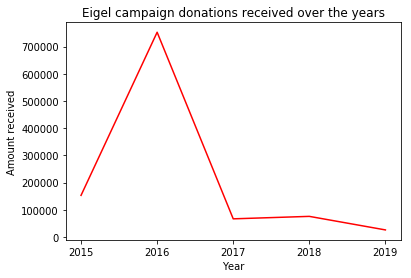

In [7]:
plt.plot(Eigel_yr['year'], Eigel_yr['amount'], color='red')
plt.xlabel('Year')
plt.ylabel('Amount received')
plt.title('Eigel campaign donations received over the years')
plt.show()

In [8]:
##The trend goes similar for others
Onder_donation = data.loc[data['committee name'].isin(['ONDER FOR MISSOURI'])]
Onder_yr = Onder_donation.groupby('year').sum()
Onder_yr = Onder_yr.reset_index() ##so that "year" can also gets counted as a column
Onder_yr['year'] = Onder_yr['year'].astype(str)

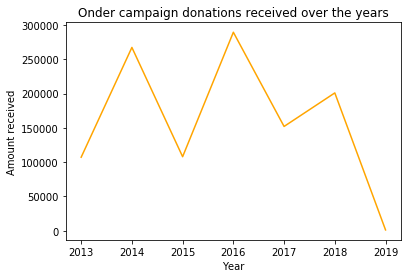

In [9]:
plt.plot(Onder_yr['year'], Onder_yr['amount'], color='orange')
plt.xlabel('Year')
plt.ylabel('Amount received')
plt.title('Onder campaign donations received over the years')
plt.show()

In [10]:
##The trend goes similar for others
Hoskins_donation = data.loc[data['committee name'].isin(['CITIZENS FOR HOSKINS'])]
Hoskins_yr = Hoskins_donation.groupby('year').sum()
Hoskins_yr = Hoskins_yr.reset_index() ##so that "year" can also gets counted as a column
Hoskins_yr['year'] = Hoskins_yr['year'].astype(str)

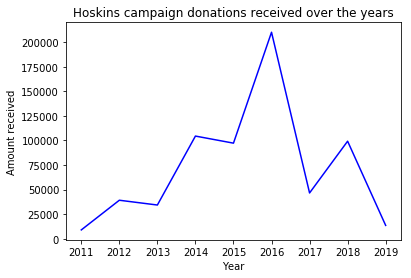

In [11]:
plt.plot(Hoskins_yr['year'], Hoskins_yr['amount'], color='blue')
plt.xlabel('Year')
plt.ylabel('Amount received')
plt.title('Hoskins campaign donations received over the years')
plt.show()

In [12]:
##Let's see if we can put these guys together.
total_by_year = total_by_year.reset_index()
total_by_year #very nice
##don't know how to plot these guys as multiple lines tho. I wanna visualize the comparison of the amount of money they each received.
##HOLD THAT THOUGHT. I'LL CIRCLE BACK TO IT.

##Trying out Chase's code:
table = pd.pivot_table(total_by_year, values='amount', index='committee name', columns='year', aggfunc=np.sum)

In [13]:
table

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
committee name,,,,,,,,,,
CITIZENS FOR HOSKINS,NaN,9075.0,39243.0,34380.0,104470.0,97274.0,210006.0,46642.0,99250.0,13675.0
EIGEL FOR MISSOURI,NaN,NaN,NaN,NaN,NaN,153166.0,752858.0,66875.0,75950.0,26150.0
FRIENDS OF ANDREW KOENIG,NaN,20923.0,27136.0,9620.0,36215.0,44370.0,407614.0,37125.0,65440.0,13375.0
FRIENDS OF ERIC BURLISON,500.0,35245.0,100931.0,39048.0,76495.0,79635.0,86121.0,128798.0,177597.0,2917.0
MISSOURIANS FOR O'LAUGHLIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92237.0,190211.0,100.0
ONDER FOR MISSOURI,NaN,NaN,NaN,107223.0,267457.0,107976.0,289625.0,152142.0,201075.0,1125.0


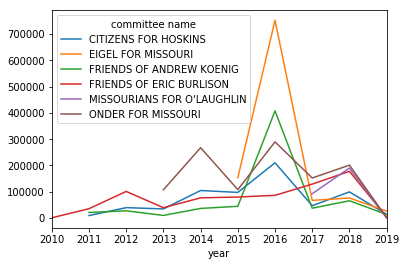

In [14]:
table.T.plot()

In [15]:
##So I wonder who gave the most money and how much did this pac give to each lawmaker?
groupdonor = data.groupby(['committee', 'year', 'committee name'])
bigdonor = groupdonor.sum().sort_values(by='amount', ascending=False)[:20]
bigdonor
##this is not perfect, because the database itself is pretty messy. Sometimes it's a committee, but sometimes it gets listed under the company column.

cd1_a id  \
committee                                year committee name                       
MISSOURI CLUB FOR GROWTH PAC             2016 EIGEL FOR MISSOURI         2127680   
                                              FRIENDS OF ANDREW KOENIG    713857   
CITIZENS FOR BRAD LAGER                  2014 ONDER FOR MISSOURI          441296   
GROW MISSOURI                            2014 ONDER FOR MISSOURI          891284   
MISSOURI CLUB FOR GROWTH                 2014 ONDER FOR MISSOURI          441294   
ONDER FOR MISSOURI                       2016 EIGEL FOR MISSOURI         2116753   
AMEREN MISSOURI PAC                      2014 ONDER FOR MISSOURI          922641   
MO SENATE CAMPAIGN COMMITTEE             2016 FRIENDS OF ANDREW KOENIG   1534467   
AMEREN MISSOURI PAC                      2016 ONDER FOR MISSOURI         1426348   
                                              EIGEL FOR MISSOURI         2123251   
MO CPA PAC                               2016 CITIZENS FOR HOSKINS       2845325   
CITIZENS TO ELECT MIKE KEHOE             2016 FRIENDS OF ANDREW KOENIG   1506550   
MISSOURIANS FOR EXCELLENCE IN GOVERNMENT 2014 ONDER FOR MISSOURI          449990   
COMMITTEE TO ELECT RON RICHARD           2016 CITIZENS FOR HOSKINS       1392628   
GROW MISSOURI                            2015 ONDER FOR MISSOURI         1139919   
CITIZENS FOR MIKE KEHOE                  2016 ONDER FOR MISSOURI          715893   
MO OPTOMETRIC ASSOCIATION                2015 CITIZENS FOR HOSKINS       1264111   
CITIZENS FOR MARK PARKINSON              2016 EIGEL FOR MISSOURI         1344037   
MO MAJORITY PAC                          2016 CITIZENS FOR HOSKINS       1520327   
AMEREN MO PAC                            2016 FRIENDS OF ANDREW KOENIG   1491973   

                                                                        amount  
committee                                year committee name                    
MISSOURI CLUB FOR GROWTH PAC             2016 EIGEL FOR MISSOURI         83969  
                                              FRIENDS OF ANDREW KOENIG   25000  
CITIZENS FOR BRAD LAGER                  2014 ONDER FOR MISSOURI         25000  
GROW MISSOURI                            2014 ONDER FOR MISSOURI         16500  
MISSOURI CLUB FOR GROWTH                 2014 ONDER FOR MISSOURI         15000  
ONDER FOR MISSOURI                       2016 EIGEL FOR MISSOURI         10501  
AMEREN MISSOURI PAC                      2014 ONDER FOR MISSOURI         10000  
MO SENATE CAMPAIGN COMMITTEE             2016 FRIENDS OF ANDREW KOENIG   10000  
AMEREN MISSOURI PAC                      2016 ONDER FOR MISSOURI         10000  
                                              EIGEL FOR MISSOURI         10000  
MO CPA PAC                               2016 CITIZENS FOR HOSKINS       10000  
CITIZENS TO ELECT MIKE KEHOE             2016 FRIENDS OF ANDREW KOENIG   10000  
MISSOURIANS FOR EXCELLENCE IN GOVERNMENT 2014 ONDER FOR MISSOURI         10000  
COMMITTEE TO ELECT RON RICHARD           2016 CITIZENS FOR HOSKINS       10000  
GROW MISSOURI                            2015 ONDER FOR MISSOURI          7500  
CITIZENS FOR MIKE KEHOE                  2016 ONDER FOR MISSOURI          7500  
MO OPTOMETRIC ASSOCIATION                2015 CITIZENS FOR HOSKINS        7301  
CITIZENS FOR MARK PARKINSON              2016 EIGEL FOR MISSOURI          6500  
MO MAJORITY PAC                          2016 CITIZENS FOR HOSKINS        6000  
AMEREN MO PAC                            2016 FRIENDS OF ANDREW KOENIG    5500

Story idea #1: Missouri Club for Growth PAC (as well as Grow Missouri) is largely funded by Rex Sinquefield, who's a mega GOP donor in St. Louis. He funded the effort to merge St. Louis County and the city of St. Louis. It's therefore really interesting yet not surprising to see him at the top of the list of big donors over the past few years. I wonder whether there's a story about him funding Eigel and Koenig for tax-related issues, because both Eigel and Koenig are big on income tax cuts and tax credits. 
There are news articles about how his main interests are income tax cuts and educational reform, so it makes sense for him to write big checks to Republicans like Eigel and Koenig. I'm interested in what these two lawmakers gave him back in return.

In [16]:
#what about companies?
groupcompany = data.groupby(['company', 'year', 'committee name'])
bigcompanies = groupcompany.sum().sort_values(by='amount', ascending=False)[:20]
bigcompanies
##We can see how much Herzog Contracting Corp gave Eigel and Onder in 2016, although that was before the Caucus was formed.
Herzog = data.loc[data["company"].isin(['Herzog Contracting Corp'])]
Herzog #to take a closer look at how much it donated over the years. Turns out it's just the three.

,cd1_a id,mecid,committee name,committee,company,first name,last name,address 1,address 2,city,state,zip,employer,occupation,date,amount,contribution type,report,year
330,714564,C151102,EIGEL FOR MISSOURI,NaN,Herzog Contracting Corp,NaN,NaN,PO Box 1089,NaN,St Joseph,MO,64502,NaN,NaN,7/13/2016,100000,M,8 Day Before Primary Election-8/2/2016,2016
350,725594,C151102,EIGEL FOR MISSOURI,NaN,Herzog Contracting Corp,NaN,NaN,PO Box 1089,NaN,St Joseph,MO,64052,NaN,NaN,7/27/2016,50000,M,30 Day After Primary Election-8/2/2016,2016
804,797773,C131072,ONDER FOR MISSOURI,NaN,Herzog Contracting Corp,NaN,NaN,PO Box 1089,NaN,Saint Joseph,MO,64502,NaN,NaN,12/6/2016,25000,M,January Quarterly Report,2016


Story idea #2: Another interesting donor to look at. Herzog Contracting Corp is a railway construction company across North America, according to their website. This company is the same one that poured 90k into former MO Governor Eric Greitens's pocket as travel expenses, St. Louis Post-Dispatch reported. It's interesting to see it invested 150k into getting Eigel elected, especially that it invested 100k just on one day. Eigel hasn't introduced anything that's related to railroad, so I'm wondering whether it's still about the income tax cuts. If I could dig into Eigel's relationship with Herzog Contracting Corp, maybe I can figure out why the big money.

In [17]:
##focused on after the contribution limits went into effect
donation_after = data.loc[data['year'].isin(['2017','2018','2019'])].loc[data['committee'].isin(['GROW MISSOURI','MISSOURI GROWTH PAC','MISSOURI CLUB FOR GROWTH PAC'])]
donationafter = donation_after.groupby(['committee','committee name','year']).sum().sort_values(by='amount', ascending=False)
donationafter

cd1_a id  amount
committee           committee name             year                  
GROW MISSOURI       ONDER FOR MISSOURI         2018   2077734    3900
                    FRIENDS OF ERIC BURLISON   2018   1064268    2600
                    MISSOURIANS FOR O'LAUGHLIN 2018   1061255    2600
MISSOURI GROWTH PAC ONDER FOR MISSOURI         2018   1089413    2600
GROW MISSOURI       CITIZENS FOR HOSKINS       2018   1066017    1850
MISSOURI GROWTH PAC CITIZENS FOR HOSKINS       2017    938202    1500
GROW MISSOURI       EIGEL FOR MISSOURI         2018   1074088    1300
                    FRIENDS OF ANDREW KOENIG   2018   1054286    1300
                    ONDER FOR MISSOURI         2017    935929    1300
                    CITIZENS FOR HOSKINS       2017    938168     750
MISSOURI GROWTH PAC EIGEL FOR MISSOURI         2017    933977     250

In [18]:
##joining address columns (sometimes the address is split into two columns, address 1 and address 2)
data['ads'] = data['address 1']+data['address 2'].map(str)
data
#This is not perfect because in the new column there are "nan"s attached at the end as strings.

##I tried to eliminate NaNs in different ways but I couldn't do it.
##Like I used data.replace(np.nan, '', regex=True) but when I joined the two columns it changed back to NaN.
##then I also tried writing up a loop like:

#for d in data:
#    if d['address 2'] is None:
#        d['ads'] = d['address 1']
 #   else:
  #      d['ads'] = d['address 1'].map(str)+d['address 2'].map(str)

#But it didn't work. It gave me: string indices must be integers, not str
       

,cd1_a id,mecid,committee name,committee,company,first name,last name,address 1,address 2,city,state,zip,employer,occupation,date,amount,contribution type,report,year,ads
0,1133749,C151102,EIGEL FOR MISSOURI,NaN,NaN,Robert,Trone,9829 Avenel Farm Dr,NaN,Potomac,MD,20854,Retired,NaN,10/5/2018,1000,M,January Quarterly Report,2018,9829 Avenel Farm Drnan
1,1133751,C151102,EIGEL FOR MISSOURI,RQC PAC,NaN,NaN,NaN,412 County Rd 398,NaN,New Bloomfield,MO,65053,NaN,NaN,10/24/2018,1000,M,January Quarterly Report,2018,412 County Rd 398nan
2,1133757,C151102,EIGEL FOR MISSOURI,CHEYENNE INTERNATIONAL,NaN,NaN,NaN,701 S Battleground Ave,NaN,Grover,NC,28073,NaN,NaN,12/5/2018,2600,M,January Quarterly Report,2018,701 S Battleground Avenan
3,1133759,C151102,EIGEL FOR MISSOURI,MCA PAC,NaN,NaN,NaN,PO Box 5,NaN,Grover,MO,63040,NaN,NaN,10/5/2018,500,M,January Quarterly Report,2018,PO Box 5nan
4,1133760,C151102,EIGEL FOR MISSOURI,ST LOUIS AREA HOTEL ASSOCIATION PAC,NaN,NaN,NaN,6590B Scanlan Ave,NaN,St Louis,MO,63139,NaN,NaN,10/5/2018,1000,M,January Quarterly Report,2018,6590B Scanlan Avenan
5,1133762,C151102,EIGEL FOR MISSOURI,SUPPORTERS OF HEALTH RESEARCH AND TREATMENTS PAC,NaN,NaN,NaN,PO Box 11591,NaN,St Louis,MO,63105,NaN,NaN,10/18/2018,2000,M,January Quarterly Report,2018,PO Box 11591nan
6,1133766,C151102,EIGEL FOR MISSOURI,MO BEVERAGE PAC,NaN,NaN,NaN,PO Box 1865,NaN,Jefferson City,MO,65101,NaN,NaN,10/1/2018,300,M,January Quarterly Report,2018,PO Box 1865nan
7,1133768,C151102,EIGEL FOR MISSOURI,MAJOR BRANDS INC PAC,NaN,NaN,NaN,6701 Southwest Ave,NaN,St Louis,MO,63146,NaN,NaN,10/16/2018,1000,M,January Quarterly Report,2018,6701 Southwest Avenan
8,1133770,C151102,EIGEL FOR MISSOURI,NEXUS PAC,NaN,NaN,NaN,714 Locust St,NaN,St Louis,MO,63146,NaN,NaN,10/22/2018,1500,M,January Quarterly Report,2018,714 Locust Stnan
9,1133772,C151102,EIGEL FOR MISSOURI,MISSOURI OSTEOPATHIC PAC,NaN,NaN,NaN,1423 Randy Ln,NaN,Jefferson City,MO,65101,NaN,NaN,10/5/2018,1000,M,January Quarterly Report,2018,1423 Randy Lnnan


In [19]:
##looking for shell PACs
donations_by_ads = data.loc[data['year'].isin(['2017','2018','2019'])].groupby(['ads','committee','committee name','year']).sum().sort_values(by='ads', ascending=False)
donations_by_ads

cd1_a id  \
ads                                                committee                              committee name             year             
The American Roadnan                               FORD MOTOR COMPANY PAC                 CITIZENS FOR HOSKINS       2017    938054   
                                                   FORD MOTOR COMPANY CIVIC ACTION FUND   FRIENDS OF ANDREW KOENIG   2017    930377   
The American Road nan                              FORD MOTOR COMPANY CIVIC ACTION FUND   ONDER FOR MISSOURI         2018   1040575   
                                                                                                                     2017    935966   
Rte1nan                                            SCOTLAND CO CENTRAL COMMITTEE          MISSOURIANS FOR O'LAUGHLIN 2018   1095653   
PoBox 1165nan                                      MISSOURI INSURANCE PAC                 FRIENDS OF ANDREW KOENIG   2018   1167261   
Po Box 651nan                                      MO MAJORITY PAC                        FRIENDS OF ANDREW KOENIG   2018   1133118   
POI Box 60nan                                      MO HOSPITAL ASSN PAC                   MISSOURIANS FOR O'LAUGHLIN 2018   1085493   
PO Box684nan                                       MO DERMATOLOGICAL SOCIETY              MISSOURIANS FOR O'LAUGHLIN 2018   1095635   
PO Box 961039nan                                   BNSF RAILPAC                           EIGEL FOR MISSOURI         2018    975823   
                                                                                          ONDER FOR MISSOURI         2018   1022421   
PO Box 89nan                                       MO TRUCK PAC                           ONDER FOR MISSOURI         2018   1008559   
                                                                                          FRIENDS OF ERIC BURLISON   2018   1064465   
                                                                                          EIGEL FOR MISSOURI         2018   1133786   
PO Box 89PO Box 89                                 MO TRUCK PAC                           CITIZENS FOR HOSKINS       2017    896298   
PO Box 780nan                                      AMEREN MISSOURI PAC                    ONDER FOR MISSOURI         2018   1089445   
                                                                                                                     2017    935903   
                                                                                          FRIENDS OF ANDREW KOENIG   2017    927542   
PO Box 780 nan                                     AMEREN MISSOURI PAC                    EIGEL FOR MISSOURI         2017    933979   
PO Box 751nan                                      MO MAJORITY PAC                        MISSOURIANS FOR O'LAUGHLIN 2018   1085488   
PO Box 684nan                                      MISSOURI DERMATOLOGICAL SOCIETY        ONDER FOR MISSOURI         2018   1069149   
PO Box 651nan                                      MO MAJORITY PAC                        ONDER FOR MISSOURI         2018   1089415   
                                                   MISSOURI MAJORITY PAC                  FRIENDS OF ERIC BURLISON   2018   1084717   
                                                                                          EIGEL FOR MISSOURI         2017    870715   
PO Box 60nan                                       MISSOURI HOSPITAL ASSOCIATION PAC      EIGEL FOR MISSOURI         2018   1074010   
                                                                                                                     2017    933989   
                                                   MHA PAC FOR HEALTH                     ONDER FOR MISSOURI         2018   1040597   
                                                                                                                     2017    935931   
                                                   MHA PAC               

Story idea #3: By parsing through these addresses, it's not difficult to notice that a lot of committees share a same address. In campaign finance, this is usually a red flag because those could be shell PACs. I used SQL for this analysis and did an investigative story this April on this shell game, where the 10 PACs registered 101 E. High St are exclusively funded by one Columbia developer.

Here we can see there are some sharing P.O. Box 60, and 101 E High St is pretty popular on the list too. The data is pretty messy, and I honestly don't quite know how to clean it up in python just yet, but at least I can eyeball it and try to figure out which ones are just like the 10 shell PACs I wrote about, who's funding them and who are they giving money to.

The reason I selected years after 2016 was because Missourians put in place a contribution cap of $2,600 for each candidate. That means if any group of shell pacs funded by the same person or company together donate an amount that exceeds 2,600, they may be doing so in a concerted effort to conceal their identity and bypass the contribution limits. This should be a very interesting story to dig in. 